In [1]:
import pandas as pd

In [2]:
fr_clean = pd.read_csv("fake reviews dataset.csv")

In [3]:
fr_clean.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
fr_clean.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
fr_clean["label"].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [6]:
fr_clean['review_length'] = fr_clean['text_'].apply(lambda x: len(x.split()))
print(fr_clean['review_length'].describe())
print(fr_clean.groupby('label')['review_length'].describe())

count    40432.000000
mean        67.465423
std         69.581333
min          1.000000
25%         21.000000
50%         39.000000
75%         85.000000
max        373.000000
Name: review_length, dtype: float64
         count       mean        std  min   25%   50%   75%    max
label                                                             
CG     20216.0  61.288237  61.799015  1.0  19.0  35.0  77.0  318.0
OR     20216.0  73.642610  76.078420  5.0  23.0  42.0  93.0  373.0


In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyuliew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kyuliew/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.strip().lower()
    text = re.sub(r'\s+', ' ', text)
    
    return text

In [9]:
fr_clean.rename(columns = {'text_': 'text'}, inplace = True)

In [10]:
fr_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       40432 non-null  object 
 1   rating         40432 non-null  float64
 2   label          40432 non-null  object 
 3   text           40432 non-null  object 
 4   review_length  40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [11]:
def remove_stop_words(sentence):
    stop_words = set(stopwords.words('english'))
    non_stop_words = []
    cleaned_sentence = " "
    for word in sentence.split():
        if word not in stop_words:
            non_stop_words.append(word)
    return cleaned_sentence.join(non_stop_words)

In [12]:
fr_clean['cleaned_text'] = fr_clean['text'].apply(clean_text)

In [13]:
fr_clean['cleaned_text'].head()

0    love this well made sturdy and very comfortabl...
1    love it a great upgrade from the original ive ...
2    this pillow saved my back i love the look and ...
3    missing information on how to use it but it is...
4    very nice set good quality we have had the set...
Name: cleaned_text, dtype: object

In [14]:
fr_clean['cleaned_text'] = fr_clean['cleaned_text'].apply(remove_stop_words)
fr_clean['token'] = fr_clean['cleaned_text'].apply(word_tokenize)

In [15]:
fr_clean['token'].head()

0    [love, well, made, sturdy, comfortable, love, ...
1    [love, great, upgrade, original, ive, mine, co...
2      [pillow, saved, back, love, look, feel, pillow]
3    [missing, information, use, great, product, pr...
4         [nice, set, good, quality, set, two, months]
Name: token, dtype: object

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
from textblob import TextBlob

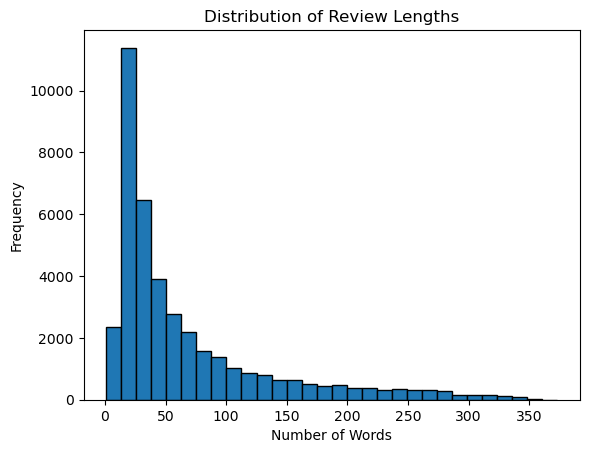

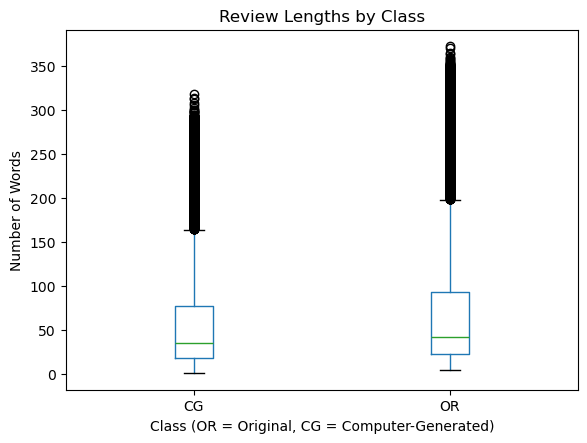

Most Common Words in Real Reviews:
[('one', 6810), ('great', 5774), ('like', 5241), ('book', 5218), ('good', 4744), ('would', 4325), ('well', 4218), ('love', 3942), ('really', 3534), ('get', 3524)]

Most Common Words in Fake Reviews:
[('great', 10645), ('book', 9783), ('good', 9451), ('love', 6863), ('story', 6761), ('one', 6585), ('well', 6061), ('would', 6037), ('read', 5609), ('little', 5318)]


In [17]:
# Distribution of Review Lengths
plt.hist(fr_clean['review_length'], bins=30, edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Review Lengths by Class
fr_clean.boxplot(column='review_length', by='label', grid=False)
plt.title('Review Lengths by Class')
plt.suptitle('')  # Remove default title
plt.xlabel('Class (OR = Original, CG = Computer-Generated)')
plt.ylabel('Number of Words')
plt.show()

# Word Frequency Analysis
# Combine text by class
or_text = ' '.join(fr_clean[fr_clean['label'] == 'OR']['cleaned_text'])
cg_text = ' '.join(fr_clean[fr_clean['label'] == 'CG']['cleaned_text'])

# Count most common words
or_word_counts = Counter(or_text.split())
cg_word_counts = Counter(cg_text.split())

print("Most Common Words in Real Reviews:")
print(or_word_counts.most_common(10))

print("\nMost Common Words in Fake Reviews:")
print(cg_word_counts.most_common(10))

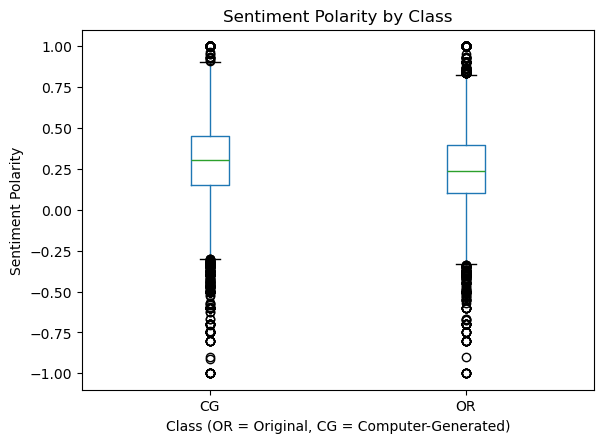

Shortest Reviews:
                                            cleaned_text label
21686                                               well    CG
37914                                                       CG
36832                                 nice elegant watch    CG
5675   div idvideoblockrsgifcacnuwea classasection as...    CG
12409              remind colussestheworldstowardsthediv    CG

Longest Reviews:
                                            cleaned_text label
15543  movies moods tastes occasions emphasize dialog...    OR
4045   interest pan satisfy longing perfect easy egg ...    OR
15575  ecw extreme evolution never seen ecw buying th...    OR
15531  going first importantly season three scoobydoo...    OR
11985  camera dxo labs gave following rating need sus...    OR


In [18]:
#Sentiment Analysis
# Calculate sentiment polarity (-1 = negative, 1 = positive)
fr_clean['sentiment'] = fr_clean['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Boxplot of sentiment by class
fr_clean.boxplot(column='sentiment', by='label', grid=False)
plt.title('Sentiment Polarity by Class')
plt.suptitle('')
plt.xlabel('Class (OR = Original, CG = Computer-Generated)')
plt.ylabel('Sentiment Polarity')
plt.show()

# Outlier Analysis 
# Shortest reviews
print("Shortest Reviews:")
print(fr_clean.nsmallest(5, 'review_length')[['cleaned_text', 'label']])

# Longest reviews
print("\nLongest Reviews:")
print(fr_clean.nlargest(5, 'review_length')[['cleaned_text', 'label']])

In [19]:
#feature extraction using TF-IDF and training the model
#importing the libraries i need
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#covert class labels to numeric
fr_clean['label_numeric'] = fr_clean['label'].apply(lambda x: 1 if x == 'OR' else 0)

#TF-IDF Feature Extraction
tfidf = TfidfVectorizer(max_features = 5000)
X = tfidf.fit_transform(fr_clean['cleaned_text']).toarray()
y = fr_clean['label_numeric']
print("TF-IDF Feature Matrix Shape:", X.shape)

TF-IDF Feature Matrix Shape: (40432, 5000)


In [20]:
#Model Training
#splitting the train and test

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=238)
model = LogisticRegression()
model.fit(X_train, y_train)

#Model Prediction on Test set
y_pred = model.predict(X_test)

print(y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_names = tfidf.get_feature_names_out()
importance = model.coef_[0]
important_words = sorted(zip(importance, feature_names), reverse=True)[:10]
print("Top 10 Important Words:", important_words)


[0 0 0 ... 1 1 1]
Accuracy: 0.8800544083096328

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      3993
           1       0.88      0.89      0.88      4094

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087

Top 10 Important Words: [(5.38966931365522, 'even'), (4.786489917410576, 'without'), (4.305066782917835, 'though'), (3.9673020129108956, 'however'), (3.707729602130425, 'wont'), (3.6491348077015293, 'end'), (3.6457800051126186, 'much'), (3.550135768805415, 'actually'), (3.3820405284309607, 'instead'), (3.3061062561069545, 'although')]


In [21]:
import dill as pickle

In [22]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)

In [23]:
with open('vectorizer.pkl','wb') as f:
    pickle.dump(tfidf,f)